In [37]:
import zipfile
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

with zipfile.ZipFile('./trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Data handling

In [38]:
#data = pd.read_csv('./CIFAR_Data.csv')
dir_list = os.listdir('./trafficsigns_dataset')
dir_list.remove('.DS_Store')
dir_list.remove('Readme.txt')

print(dir_list)
path='./trafficsigns_dataset/'
arr=[]

counter1=1
counter2=1


for i in dir_list:
    dir_listtemp=os.listdir(path+i)
    if '.DS_Store'in dir_listtemp:
        dir_listtemp.remove('.DS_Store')

    for j in dir_listtemp:
        dir_listtemp2=os.listdir(path+i+'/'+j)

        for k in dir_listtemp2:
            arr.append((path+i+'/'+j+'/'+k, counter1, counter2))
        counter2+=1
    counter1+=1
    #counter2+=1

data = np.array(arr)
                #dtype=[("a", "str"), ("b", "i4"), ("c", "i4")])
df = pd.DataFrame(data, columns=['Image', 'Form', 'Type'])

df.to_csv('trafficsigns_data.csv',index=True, index_label='ID' )        
            
 




['diamond', 'hex', 'round', 'square', 'triangle']


In [39]:
#Datasplit

train, val = train_test_split(df, test_size=0.20, random_state=42)
print(df.shape)
print(train.shape)
print(val.shape)

(3700, 3)
(2960, 3)
(740, 3)


# EDA

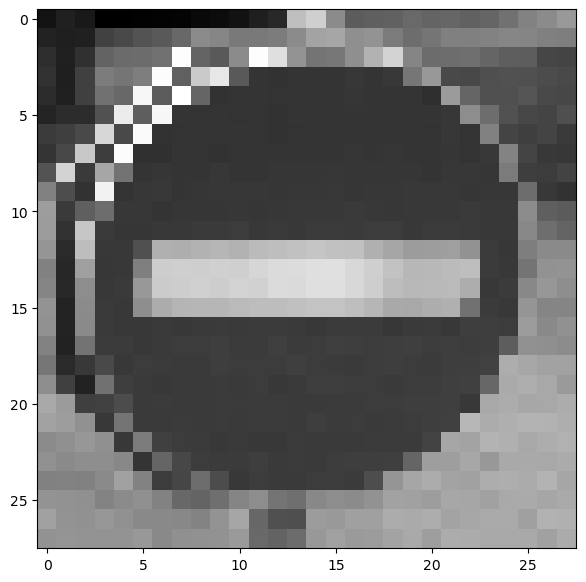

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,34,47,40,16,16,18,19,20,25,28,33,45,54,195,210,146,102,105,107,115,110,112,108,111,122,138,146,159
1,48,45,47,77,86,94,100,114,146,142,130,129,132,146,169,171,150,154,131,118,126,136,136,138,142,141,136,134
2,59,46,62,109,116,117,123,253,110,100,146,253,225,155,125,128,150,183,214,141,117,118,120,111,104,103,82,80
3,63,45,76,132,126,134,252,106,205,232,100,66,63,66,66,66,68,66,69,127,158,86,84,90,93,91,87,86
4,58,46,76,123,114,247,102,255,111,63,64,65,64,65,65,65,67,65,65,66,60,161,111,91,91,96,86,83
5,50,58,58,93,237,104,247,66,64,65,64,64,63,66,66,66,66,66,66,65,65,68,148,118,93,83,80,90
6,72,75,86,217,86,250,63,64,64,65,65,64,63,64,66,65,66,66,65,66,64,68,64,137,80,75,80,71
7,66,84,203,73,252,62,61,65,64,63,65,66,65,65,66,66,67,65,67,66,65,67,64,69,140,80,70,68
8,94,214,71,171,124,65,67,65,66,68,66,66,67,67,67,68,67,67,67,67,66,68,68,67,131,74,73,79
9,137,88,63,242,64,68,69,65,67,68,68,68,67,68,68,69,67,68,68,69,69,69,67,68,68,118,70,63


In [40]:
plt.figure(figsize=[7, 7])
plt.imshow(Image.open(df['Image'][750]), cmap='gray')
#plt.title('Digit: %i; Resolution (pixels): %dx%d' % (df3['Image'][10], *df3['Image'][10].size()), fontsize=20)
plt.show()
#What the computer "sees",  pixel values indicate color (0=white to 255=black)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 500):
    display(pd.DataFrame(np.asarray(Image.open(df['Image'][750]))))

In [53]:
train.describe()

,Image,Form,Type
count,2960,2960,2960
unique,2960,5,16
top,./trafficsigns_dataset/round/trafficdirective/...,3,16
freq,1,1420,564
